Though fault slip rates must change through time (they obviously start at some point and will stop eventually), the degree to which they change throughout their 'lifetimes' and the magnitudes and timescales involved any changes aren't typically well known. However, this variability surely reflects the mechanics of faulting and crustal deformation, and is also of importance to fault-based seismic hazard assessment, as the slip rate is a fundamental parameter describing earthquake occurrence on the fault.

There are four major timescales over which fault slip rates are measured, and over which slip rates could change, by my reckoning (based largely on techniques but also on different deformation styles). I'll describe these briefly, and then get on to the major topic of this post, which is demonstrating how the natural variability (i.e. aleatoric uncertainty) in earthquake recurrence and per-event slip magnitude can impact Quaternary slip rate estimates.

## Slip rate timescales and measurements

The shortest is the individual earthquake cycle (i.e. the interseismic, coseismic and postseismic periods for a single earthquake). Slip rate variability here is high (to the point of stretching the use of the term) and the style of slip changes dramatically throughout. During the interseismic period, slip rates are on the order of mm/yr and slip doesn't typically take place on the shallow parts of the fault; instead there is a far-field velocity gradient, perhaps creep on the ductile roots of a fault, or perhaps more distributed viscoelastic flow in the lower crust and upper mantle that causes the velocity gradient. During the coseismic period, which lasts for a few seconds at any given point on a fault, slip rates are localized on the fault and are up to a few m/s. The postseismic period can have a mixture of these behaviors, with afterslip being localized on the upper fault at mm to m/day rates, and distributed viscoelastic rebound in the lower crust and upper mantle (below the crust that slipped during the earthquake). Fault slip rates over earthquake cycle timescales are typically measured with geodesy, over seconds to years.

The longest timescale is 'deep time', millions to hundres of millions of years. Over this timescale, the conditions causing faults to slip may change, as plate configurations change progressively (or abruptly), mountain ranges rise and fall and modify gravitational potential energy distributions as they do so. On a smaller spatial scale, fault networks can evolve, changing how regional strain is allocated onto individual structures. Fault slip rates during this timescale are typically in km/Myr (which equals mm/yr) and are generally measured by map or cross-section restoration of bedrock units that have been cut and offset by a fault, or by thermochronology, or in rare cases more arcane and imprecise techniques such as paleomagnetism. Rock units are dated through geochronology (ideally zircon U-Pb) or stratigraphic techniques (fossil assemblages, etc) and the ages may be quite precise and accurate, but are not always.  Furthermore, it's often difficult to find units that are younger than the time faulting began and therefore are accurate records of the rate--the slip rate will be biased downwards if the units predate displacement substantially.  Nonetheless, slip rates over the shorter end of this timescale (millions to a few tens of millions of years) often match geodetic rates well--within a factor of two or less--which I find absolutely shocking, and which demonstrates something profound about tectonics and orogenesis: Deformation systems (fault networks, etc.) configure themselves fairly rapidly to a fairly stable state, though they are fundamentally accommodating geometric change. There is a lot to this, surely involving major pre-existing and persistent differences in fault strength due to tectonic inheritance, but I am going to completely punt on this discussion for this blog post, as it's beside the point.

There are two intermediate timescales that grade into each other, but are both essentially Quaternary. The shorter is paleoseismology, which usually involves trenching a fault scarp and characterizing individual earthquakes as recorded in the few meters of exposed strata (which are non-lithified deposits, soils and regolith). Strain here is localized on the fault, or pretty close to it; earthquakes that don't reach the surface are unfortunately invisible to paleoseismology. The main product of paleoseismology is the *timing* of earthquakes, though it may be possible to estimate the slip per event and therefore the magnitude of each event (with big errorbars) and the slip rate over the handful of visible earthquakes. Earthquake ages are bracketed by dating Quaternary deposits that are cut and not cut by the earthquake or by colluvial wedges against an old buried scarp that may be assumed to be coseismic. The actual dates are gotten through radiocarbon dating of organic material in the deposits. Slip rates from paleoseismology are mm/yr scale and the measured offsets are in meters. The timescales are from a few tens to a few tens of thousands of years. Most trenches have a single-digit number of earthquakes, commonly one to three.  Slip rates from paleoseismology can change due to natural variability in the time between earthquakes (for whatever reason, internal or external to the fault), and from [censoring](https://en.wikipedia.org/wiki/Survival_analysis#Censoring) in the time series analysis, where we don't know the total length of time between the oldest dated unit in the trench and the last earthquake older than that, or between the last earthquake (or dated unit) and the next future earthquake. It's unclear why or how there would be major variations in something that we could call a secular slip rate (far-field displacement rate or fault loading) over the paleoseismological timescale (fault interaction perhaps), but we also don't know enough about it to rule anything out.

The longer intermediate (Quaternary) timescale is the neotectonic scale. This is a thousand years to a few million years. Deformation measurements are typically taken from Quaternary geomorphic features (e.g. unconsolidated fluvial terraces or alluvial fans) that may not be indurated and incorporated into the bedrock sedimentary geologic record. The offset measurements are more or less similar to bedrock offsets: they are taken from correlated marker units cut by the fault, in map pattern or cross-section (or by field surveys with a compass and level, or from LiDAR, etc.). There can be a bit more ambiguity with the reconstructions and correlations across the fault, though--Quaternary fans and terraces don't always look very distinct from each other, and are often correlated based on relative position within each other or the degree of incision of the surface. These units are usually dated with cosmogenic nuclides (<sup>10</sup>Be, <sup>36</sup>Cl, etc.) which is straightforward in principle but the dates can be ugly, and issues such as erosion, cosmogenic nuclide inheritance, and multiple episodes of deposition within the upper few meters can be hard to deal with or even detect. Slip rate changes within the neotectonic timeframe may be influenced by earthquake cycle variability, fault interaction and changing boundary conditions, or other processes.

# The effects of earthquake recurrence variability

It is clear from paleoseismology, the historical, (and in a few instances) instrumental seismological records that some variability exists in the time between earthquakes on a given fault section. This real variability is the *aleatoric uncertainty* in earthquake recurrence intervals, which I prefer to call the *natural variability*. There is also *epistemic uncertainty*, relating to the imprecision and inaccuracy in our earthquake inference techniques; these can be very large, particularly with paleoseismology, but also with historical seismology (especially the presence or absence of a given event in old writings).

Both sorts of uncertainty can impact the estimated slip rate at a site. In this post, though, I'm going to focus on the natural variability's impact on slip rate estimates, and exclude the role of epistemic uncertainty.

In this post, I will quantify the effects of the natural variability of earthquake slip and recurrence through Monte Carlo simulation. I will generate long sequences of earthquakes with different recurrence distributions and then take the estimated slip rate (measured offset / measured time) for different time windows, and look at how the variability in the estimated rates changes with increasing time window.

This is all done in a Jupyter notebook running Python 3, using the numerical Python trifecta of `numpy`, `scipy`, and `matplotlib`. The notebook can be downloaded [here](https://gist.github.com/cossatot/af6ded75f403795ec79e7fb263ae87bc).

### Notebook setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
np.random.seed(420)

## Earthquake recurrence distributions

It is obvious that earthquake recurrence intervals have some variation (i.e., they are not perfectly periodic). Nonetheless, the nature of this variation is subject to a bit of debate. There are a handful of candidate distributions that are primarily argued about by statistical seismologists. These distributions have their roots in a variety of sources (mostly from statistics and survival/reliability analysis, with one, the [Brownian Passage Time](http://www.bssaonline.org/content/92/6/2233.short), from seismology) but they all effectively correspond to three different behaviors: (Quasi-)periodic, Poissonian (i.e. 'random'), and clustered.

Periodic earthquakes are those that occur with some regular recurrence interval. This basically means that the probability of an earthquake occurring varies with time since the last earthquake: it starts out at (or very close to) zero following the previous earthquake, and then climbs progressively to the modal rate, which is pretty close to the mean. The different distributions used to describe or model this behavior include the [lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution), [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution), [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution), and Brownian Passage Time distributions, and they all are pretty similar over the central parts of the distribution (with some variation in important properties such as conditional earthquake rate far out on the right tails; see the B.P.T. paper by Matthews et al. linked above), and are statistically indistinguishable based on a few samples (i.e. one can't indentify which distribution based on a handful of earthquakes; again, see the Matthews paper linked above). Periodic earthquakes are *more regular than random*.

Poissonian or 'random' earthquakes occur at some mean rate $\mu$, but the probability of an earthquake occurring is constant through time (at $1/\mu$), and doesn't depend on either the time since the last event or the duration of the previous (or subsequent) recurrence interval. Poissonian recurrence distributions are modeled with an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) (it is the number of events in a given interval which lends the Poisson name, as this follows a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)).

Clustered earthquakes occur closely spaced in time with big intervening gaps. This can be represented by a [hyperexponential distribution](https://en.wikipedia.org/wiki/Hyperexponential_distribution), or by some of the distributions from the periodic group with appropriate shape parameters, or other [fat-tailed distributions](https://en.wikipedia.org/wiki/Heavy-tailed_distribution). These distributions *have more closely-spaced clumps than random, with wider between-group separations than random*.


### Parameterizing earthquake periodicity or clustering

The typical parameterization of earthquake periodicity or clustering is the Coefficient of Variation ($COV$), which is the standard deviation of the recurrence intervals divided by the mean recurrence interval:

$$COV = \sigma / \mu$$

The COV may be defined for either empirical or synthetic datasets that may not have a defined parametric distribution (e.g., lognormal) or for a distribution itself as long as $\mu$ and $\sigma$ can be defined. This makes it a convenient metric for evaluating earthquake spacing:
- Periodic earthquake distributions have a $COV < 1$, i.e. $\sigma < \mu$.
- Poissonian earthquake distribution have a $COV = 1$, i.e. $\sigma = \mu$.
- Clustered earthquake distributions have a $COV > 1$, i.e. $\sigma > \mu$.


### Earthquake recurrence interval autocorrelation (ignored...)
There is another important component to earthquake recurrence that we haven't talked about, which is the autocorrelation between recurrence intervals. This basically addresses whether a long recurrence interval is followed by another long interval or by a short interval. It is a really important and really interesting topic but there is basically zero written about it explicitly; I have done some preliminary quantification from a few study areas (see [this presentation](../../2017/08/puget-sound-statistical-paleoseismology-usgs-2017/) for a few slides on it). My intuition, as well as that of some top-notch seismologists I've chatted with, is that the autocorrelation or 'memory' of earthquake recurrence intervals is probably physically-based and may be the driver of clustering or anti-clustering behavior present in the above recurrence distributions. Nonetheless, the physical mechanisms responsible aren't yet identified and I will refrain from including this in our simulation here. What this means is that *any individual recurrence interval is independent on the previous or subsequent intervals*.

### Sampling earthquakes from distributions

OK, more code, less talk.

I'm going to generate sample distributions with quasi-periodic, random, and clustered behavior. I'll use two distributions, the lognormal and exponential distribution.  I'll have three parameterizations of the lognormal distribution representing all three of the recurrence behaviors, and one of the exponential which obviously represents random earthquake behavior.

All of the distributions share a mean recurrence interval, $\mu$=1000 years. The periodic distribution has $\sigma$=500 years (COV=0.5), the clustered distribution has $\sigma$=2000 years (COV=2), and the random distributions have $\sigma$=1000 years (COV=1).

In [5]:
def lognormal_scale(arith_mean, arith_var):
    return np.log(arith_mean / 
                  np.sqrt(1 + arith_var / arith_mean**2))

def lognormal_shape(arith_mean, arith_var):
    return np.sqrt(np.log(1 + arith_var / arith_mean**2))

In [6]:
def lognormal(mean, std, n_eqs=0, return_pdf=False):
    shape = lognormal_shape(mean, std**2)
    scale = lognormal_scale(mean, std**2)
    
    _lognorm = ss.lognorm(shape,
                          scale=np.exp(scale))
    
    if return_pdf == True:
        return _lognorm
    else:
        return _lognorm.rvs(n_eqs)


def exponential(mean, std, n_eqs=0, return_pdf=False):
    if mean != std:
        raise ValueError('mean and std must be equal!')
    
    _expon = ss.expon(scale = mean)
    
    if return_pdf == True:
        return _expon
    else:
        return _expon.rvs(n_eqs)

In [7]:
lgn_1000_500 = lognormal(1000, 500, return_pdf=True)
lgn_1000_1000 = lognormal(1000, 1000, return_pdf=True)
lgn_1000_2000 = lognormal(1000, 2000, return_pdf=True)
exp_1000 = exponential(1000, 1000, return_pdf=True)

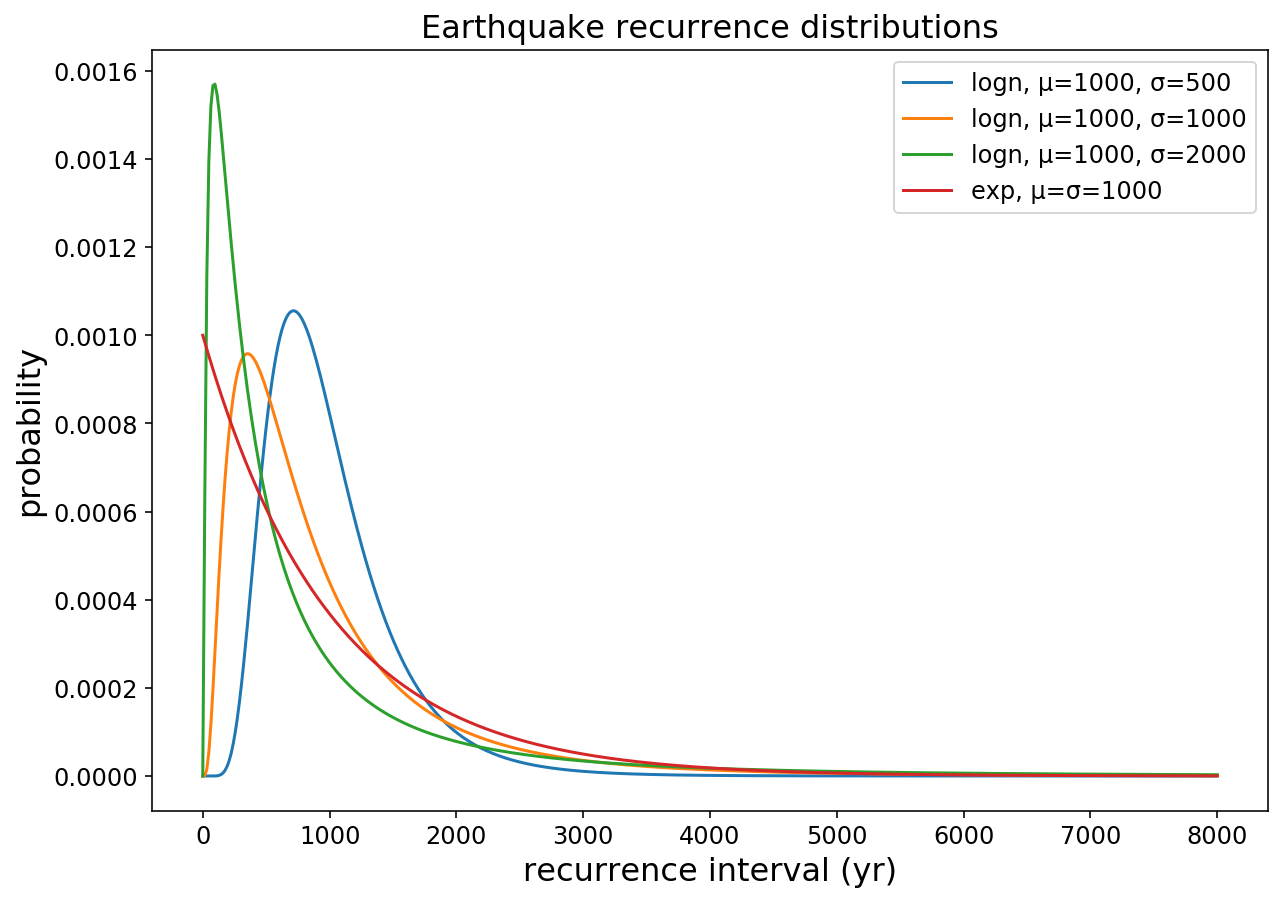

In [8]:
t = np.linspace(0,8000, 500)

plt.figure(figsize=(10,7))
plt.title('Earthquake recurrence distributions')
plt.plot(t, lgn_1000_500.pdf(t), label='logn, μ=1000, σ=500')
plt.plot(t, lgn_1000_1000.pdf(t), label='logn, μ=1000, σ=1000')
plt.plot(t, lgn_1000_2000.pdf(t), label='logn, μ=1000, σ=2000')
plt.plot(t, exp_1000.pdf(t), label='exp, μ=σ=1000')

plt.legend(loc='best')

plt.xlabel('recurrence interval (yr)')
plt.ylabel('probability')

plt.show()

*__Figure 1:__ Recurrence distributions for our fault. All have a mean (μ) of 1,000 years; the standard deviation (σ) of the lognormal ('logn') distributions change, but for the exponential distribution ('exp') it is fixed, as for this distribution the mean has to equal the standard deviation.*

### Earthquake slip distributions

Our analysis also requires generating displacements over each earthquake. These also have a lot of variability at the surface, both as measured in a paleoseismic trench, and along strike (or with depth) in an individual earthquake.  This displacement is hard to ignore but I don't really want to focus on it now, so we will stick with a relatively regular distribution and use it for all events.

We will use a longormal function with a mean of 1 m, and a standard deviation of 0.5 m:

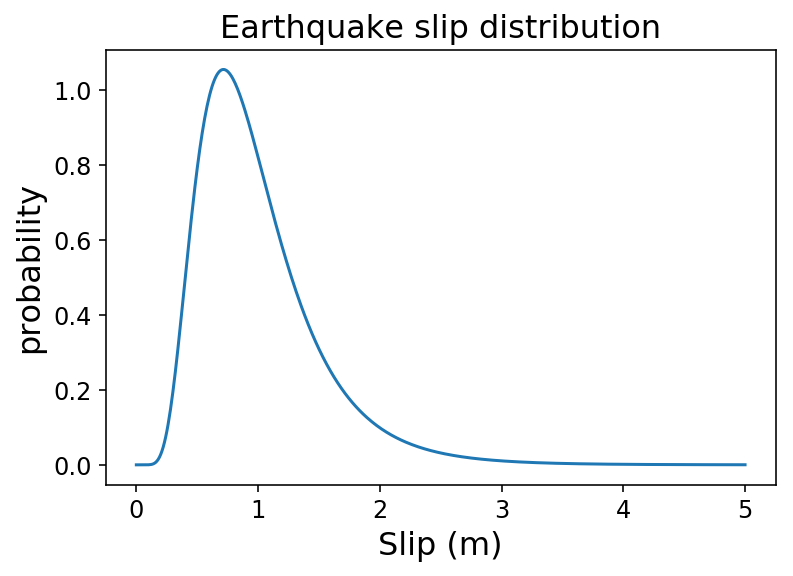

In [9]:
plt.plot(np.linspace(0, 5, num=500),
         lognormal(1, 0.5, return_pdf=True).pdf(np.linspace(0,5,num=500)))

plt.xlabel('Slip (m)')
plt.ylabel('probability')

plt.title('Earthquake slip distribution')

plt.show()

*__Figure 2__: Distribution of earthquake slip per event. This has a mean slip of 1 m, with a standard deviation of 0.5 m.*

A mean slip of 1 m per event and a mean recurrence interval of 1000 years gives a mean slip rate of 1 mm/yr. These numbers are typical rate for a smaller continental fault. 

Also, please note that the values of 1 m/event, 1 kyr recurrence, and 1 mm/yr (i.e. m/kyr, i.e. 1 km/Myr) make it so that the rate variability we're interested in can easily be adjusted (normalized) for different systems, as will be discussed towards the end of the blog post.

We're also going to make the assumption here that the slip in any earthquake is unrelated to the duration of the preceeding recurrence interval or the amount of slip in the previous event, i.e. the slip per event is statistically independent of any other variables. Though this goes against the intuition many of us have about the earthquake cycle (that strain accumulates through the interseismic period and then is released coseismically, resetting the cycle), I believe that it is consistent with what data exist on this topic, such as the datasets collected from the [central Appennines by Lucilla Benedetti and colleagues](http://onlinelibrary.wiley.com/doi/10.1002/jgrb.50299/full). But there could be a lot of variation between different systems, and some areas could show real dependence--I'm not a master of the literature on this, and would be happy to be shown some better data.

Nonetheless, statistical independence of slip and recurrence interval is the easiest to model, and from a physical perspective, it only requires the earth to be able to store enough accumulated shear stress for a handful of earthquakes, and (probably?) variable friction at failure and/or arrest, given steady loading rates. I don't think any of these requirements are outside of the bounds of geophysical reasonability.

## Making slip histories

In order to evaluate how changing the earthquake recurrence distributions can impact slip rate measurements, we will generate histories of earthquakes (with timing and slip) and then look at the rate over different time windows.

We'll do this by generating the earthquakes and then making cumulative slip histories, which simulates a fault slipping seismically and displacement at the fault progressively increasing.

We'll use a simulation length of 2 million years.

In [10]:
def sample_eq_displacements(mean, std, n_eqs):
    return lognormal(mean, std, n_eqs)

In [11]:
sim_years = int(2e6)

In [12]:
# This function makes a cumulative slip history given a recurrence mean,
# standard deviation, recurrence interval distribution, and simulation
# length.

def make_cum_slip(rec_mean, rec_std, distribution, yrs=sim_years,
                  displacement_mean=1, displacement_std=0.5):
    n_eqs = int(yrs / rec_mean) + 100
    
    eq_rec_times = np.int_(distribution(rec_mean, rec_std, n_eqs))
    eq_dates = np.cumsum(eq_rec_times)
    eq_dates = eq_dates[eq_dates < yrs]
    n_eqs = len(eq_dates)
    eq_rec_times = eq_rec_times[:n_eqs]
    
    eq_disps = sample_eq_displacements(displacement_mean,
                                       displacement_std,
                                       n_eqs)
    
    eq_slip = np.zeros(yrs)
    
    for i, yr in enumerate(eq_dates):
        eq_slip[yr] = eq_disps[i]
    
    cum_slip = np.cumsum(eq_slip)
    
    return cum_slip

In [13]:
# Now the cumulative displacement histories are made.
# We make one 2-million-year history for each distribution.

cum_disp_logn_1000_500 = make_cum_slip(1000, 500, lognormal)
cum_disp_logn_1000_1000 = make_cum_slip(1000, 1000, lognormal)
cum_disp_logn_1000_2000 = make_cum_slip(1000, 2000, lognormal)
cum_disp_exp_1000 = make_cum_slip(1000, 1000, exponential)

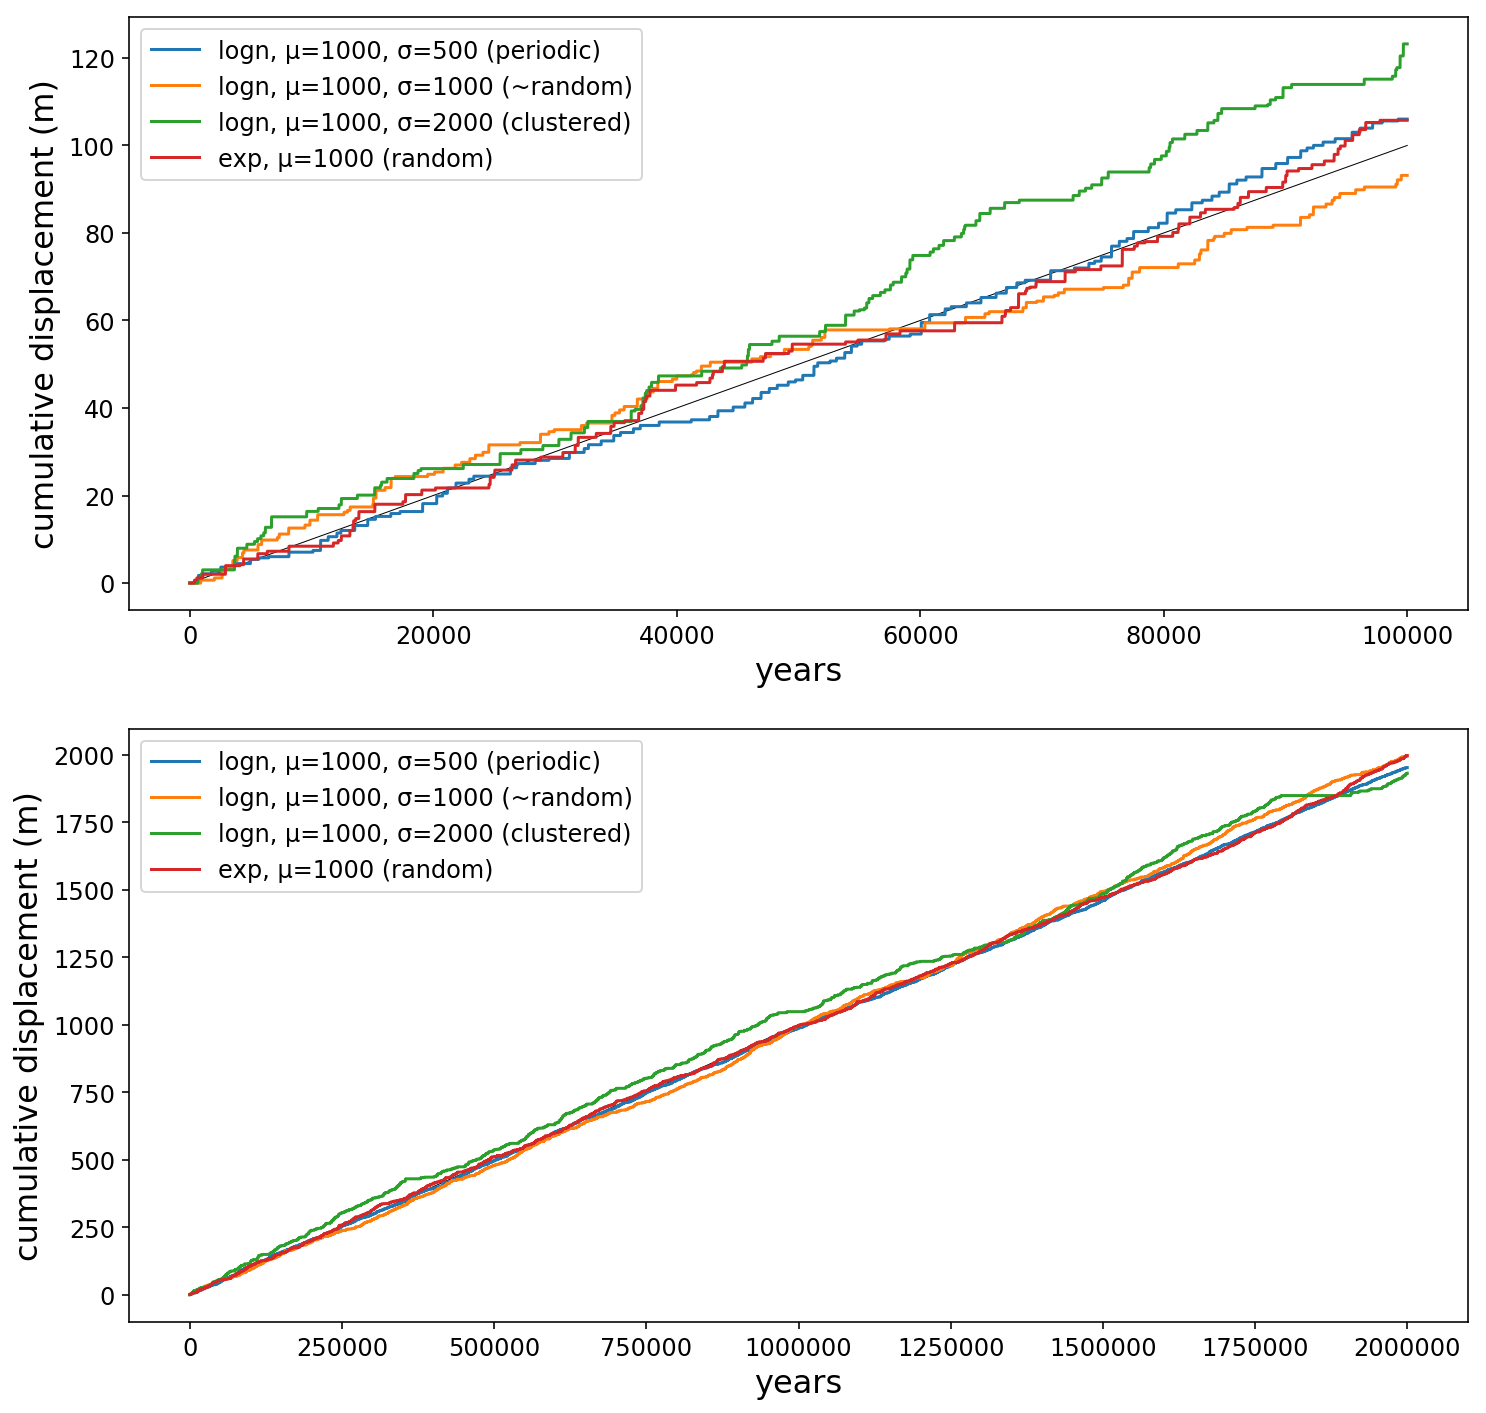

In [14]:
# This block of code plots the histories.

f, (ax0, ax1) = plt.subplots(2,1, figsize=(12,12))

# first 100,000 years
ax0.plot([0,1e5],[0,100],'k', lw=0.5)

ax0.plot(cum_disp_logn_1000_500[:int(1e5)], label='logn, μ=1000, σ=500 (periodic)')
ax0.plot(cum_disp_logn_1000_1000[:int(1e5)], label='logn, μ=1000, σ=1000 (~random)')
ax0.plot(cum_disp_logn_1000_2000[:int(1e5)], label='logn, μ=1000, σ=2000 (clustered)')
ax0.plot(cum_disp_exp_1000[:int(1e5)], label='exp, μ=1000 (random)')

ax0.legend(loc='upper left')

ax0.set_xlabel('years')
ax0.set_ylabel('cumulative displacement (m)')

# longer term
ax1.plot([0,1e6],[0,1000],'k', lw=0.5)

ax1.plot(cum_disp_logn_1000_500[:int(2e6)], label='logn, μ=1000, σ=500 (periodic)')
ax1.plot(cum_disp_logn_1000_1000[:int(2e6)], label='logn, μ=1000, σ=1000 (~random)')
ax1.plot(cum_disp_logn_1000_2000[:int(2e6)], label='logn, μ=1000, σ=2000 (clustered)')
ax1.plot(cum_disp_exp_1000[:int(2e6)], label='exp, μ=1000 (random)')

ax1.legend(loc='upper left')

ax1.set_xlabel('years')
ax1.set_ylabel('cumulative displacement (m)')


plt.show()

*__Figure 3:__ Cumulative displacement histories for each of our distributions, and the mean line (at 1 mm/yr) shown as a thin black line. The data is the same in both plots, but the top plot zooms in on the first 100 thousand years. Notice how far the cumulative displacement can get from the mean line, especially for the clustered dataset.*

It's clear that though these timeseries all have the same long-term rate, they differ quite a bit in terms of the short-term behavior. In particular, the series with the lowest COV, the periodic lognormal with the COV=0.5, tracks most closely with the mean and keeps a pretty steady rate, while the non-periodic, non-clustered series (lognormal w/ COV-1 and exponential) have a bit more variance--they have bursts of short-term rate increases and then some slow intervals as well. The clustered series, in green, with a COV=2, ranges the farthest away from the mean rate, with a kind of ratchet effect--it climbs above the mean for tens of thousands of years, then has long quiescent episodes where it regresses to the mean.

Let's look at the spacing of a handful of events from each series to see what that shows us.

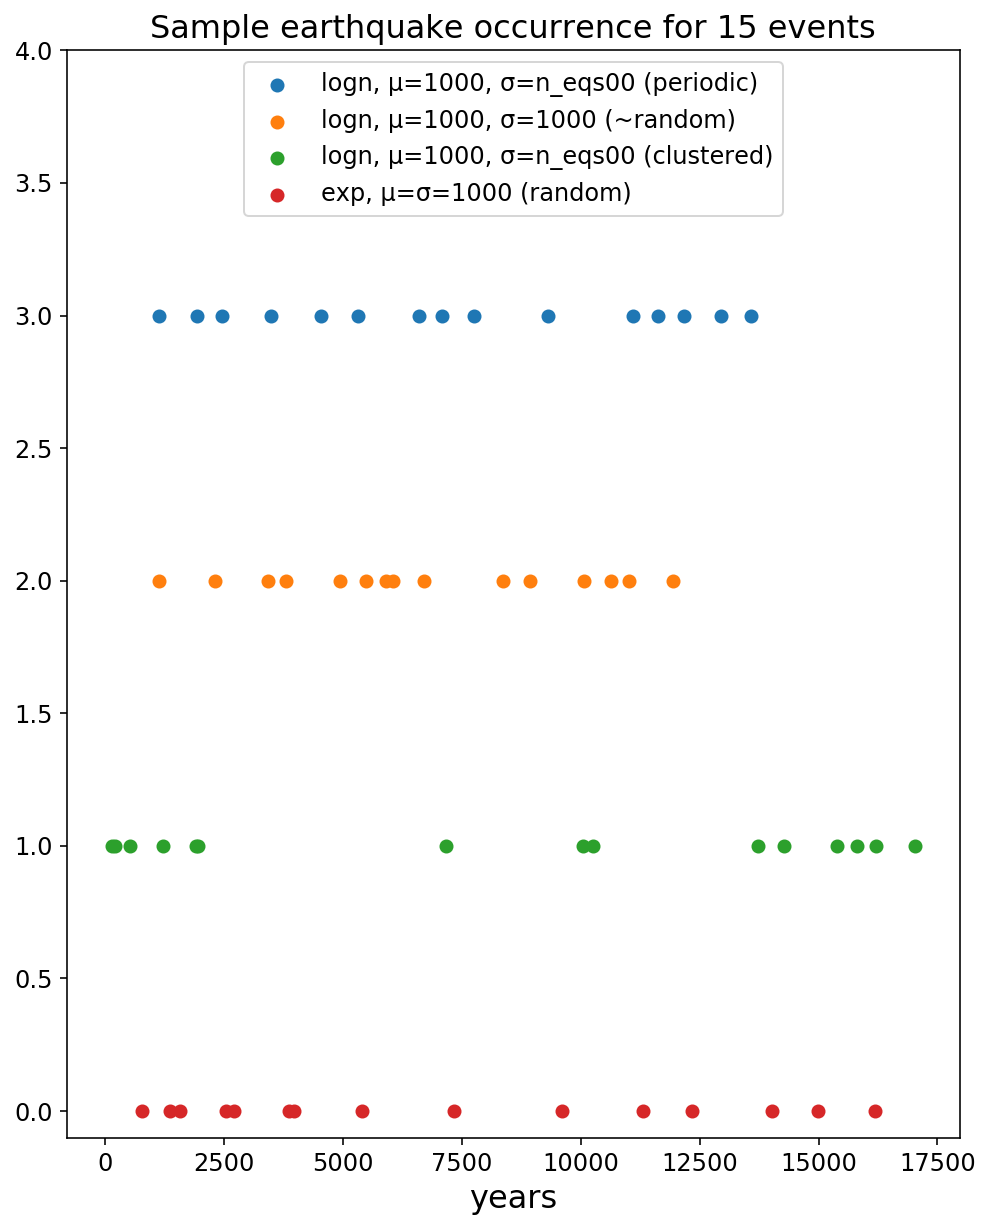

In [15]:
n_eqs = 15

plt.figure(figsize=(8,10))

plt.scatter(lognormal(1000, 500, n_eqs).cumsum(),
         np.ones(n_eqs) * 3,
         c='C0', label='logn, μ=1000, σ=n_eqs00 (periodic)')

plt.scatter(lognormal(1000, 1000, n_eqs).cumsum(),
         np.ones(n_eqs) * 2,
         c='C1', label='logn, μ=1000, σ=1000 (~random)')

plt.scatter(lognormal(1000, 2000, n_eqs).cumsum(),
         np.ones(n_eqs) * 1,
         c='C2', label='logn, μ=1000, σ=n_eqs00 (clustered)')

plt.scatter(exponential(1000, 1000, n_eqs).cumsum(),
         np.ones(n_eqs) * 0,
         c='C3', label='exp, μ=σ=1000 (random)')

plt.legend(loc='upper center')

plt.ylim([-0.1,4])
plt.xlabel('years')
plt.title('Sample earthquake occurrence for {} events'.format(n_eqs))

plt.show()

*__Figure 4:__ 15 earthquakes from each of the distributions considered.*

It's evident from Figure 4 that the periodic events (blue, COV=0.5) are fairly regularly spaced (though there is some variation), the 'random' (i.e. truly random, red, and non-periodic but non-clustered, orange) show some wider gaps than the blue sequence but have some pretty closely-spaced events, and the clustered events (green) show distinct groups that are very well separated. The apparent slip rate during these groups is quite a bit higher than during the gaps--this should yield a lot of variability in the slip rate over short timescales.

Also, please note that the series stop after 15 events; the gaps at the end aren't real! Nonetheless, this shows the apparent variability in slip (i.e. event) rate given small numbers of earthquakes, even though these all have the same long-term occurrence rate. This is what we came here to analyze, so let's get with it.

##  Calculating slip rates

Now we want to calculate slip rates from the time series, over several different timescales or time windows. The rate $R$ is simple to calculate:

$$R(D_1, D_2, t) = \frac{D_1 - D_0}{t}$$

where $D_1$ is the displacement at the end of the time window, $D_0$ is the displacement at the beginning of the time window, and $t$ is the length of the time window.

Again, what we are really interested in is the *variation in apparent slip rates due to natural variability in earthquake recurrence intervals*. We already know the mean, the true slip rate, but what we want to know is how the stochasticity in the system will affect what we pull out of it, were we to measure only a short time relative to the whole series.  In other words, *How long should we measure over in order to get a meaningful slip rate value?*

In order to do this, we'll take the function $R(D_0, D_1, t)$ and slide it along the time series, calculating a slip rate for each window placement:

```
1 2 3 4 5 6 7 8 9 10 (years)
  * **    *  ** *    (eqs)
 [----w1----]
  [----w2----]       (rates:
   [----w3----]       each is
    [----w4----]      different)
```
By doing this, we're calculating all possible slip rate estimates of a given window width over the time series. Once we're done, we'll look at the distribution of these.

Also, please note something important that deals with censoring once again: The windows will only rarely both start and end at earthquakes. This means that there will be some incomplete earthquake cycles on one or both sides. This is easy to deal with in paleoseismologic estimates of recurrence intervals by removing (censoring) the truncated observations from the recurrence interval datasets, though it decreases the number of intervals available for analysis, which may or may not be problematic. However, it's very tough to deal with in neotectonics, where the windows are basically the time between fluvial deposition or incision events, which may be unrelated to the earthquakes themselves (especially for strike-slip events), and the paleoseismic history is probably unknown.  Even if the earthquake sequence is known, one full event + inter-event time has to be removed from the dataset in order to not bias the mean. Does anyone do this?

Therefore, by including the effects of the truncated intervals, we are more accurately representing the *estimated* slip rates as would be yielded by neotectonics and some paleoseismic investigations.

In [16]:
# This is the function to calculate the slip
# rates over the time series.

def moving_average_rate(cum_disp, window, scale='mm/yr'):
    rates = [(cum_disp[i+window] - cum_disp[i]) / window
             for i in range(len(cum_disp) - window)]
    
    rates = np.array(rates)
    
    if scale == 'mm/yr':
        rates *= 1000
    elif scale == 'm/yr':
        pass
    
    return rates
    

Now let's select the window size. The basics of sampling state that the more samples you have, the closer the samples approximate the distribution, which means that the longer the time window, the closer the estimated rate will be to the true rate.  Therefore, we expect to see the most variation over short timescales, so we'll select a logarithmic spacing for the windows.

The minimum window that we'll consider is 500 years, or 1/2 of the 'earthquake cycle' or the mean recurrence interval. On the high end, we have 100,000 years--this is long enough that things should start to converge towards the mean.

In [17]:
# calculate the windows.

windows = np.logspace(np.log10(500),
                      np.log10(100000), 50, dtype='int')

Now we'll apply the moving average function to each of the cumulative displacement time series we calculated above. 

To do this, I'm using a [dictionary comprehension](https://www.python.org/dev/peps/pep-0274/) technique in Python, which will allow us to efficiently iterate over each of the windows, leaving the window length as the key to the dictionary, and the array of slip rate estimates as the value.

In [18]:
logn_1000_500_rates = {w : moving_average_rate(cum_disp_logn_1000_500, w)
                       for w in windows}

logn_1000_1000_rates = {w : moving_average_rate(cum_disp_logn_1000_1000, w)
                       for w in windows}

logn_1000_2000_rates = {w : moving_average_rate(cum_disp_logn_1000_2000, w)
                       for w in windows}

exp_1000_rates = {w : moving_average_rate(cum_disp_exp_1000, w)
                  for w in windows}

Let's look at some of the output of this (we will move on to better figures so don't worry if this figure is unclear; it's just to give an example of the data):

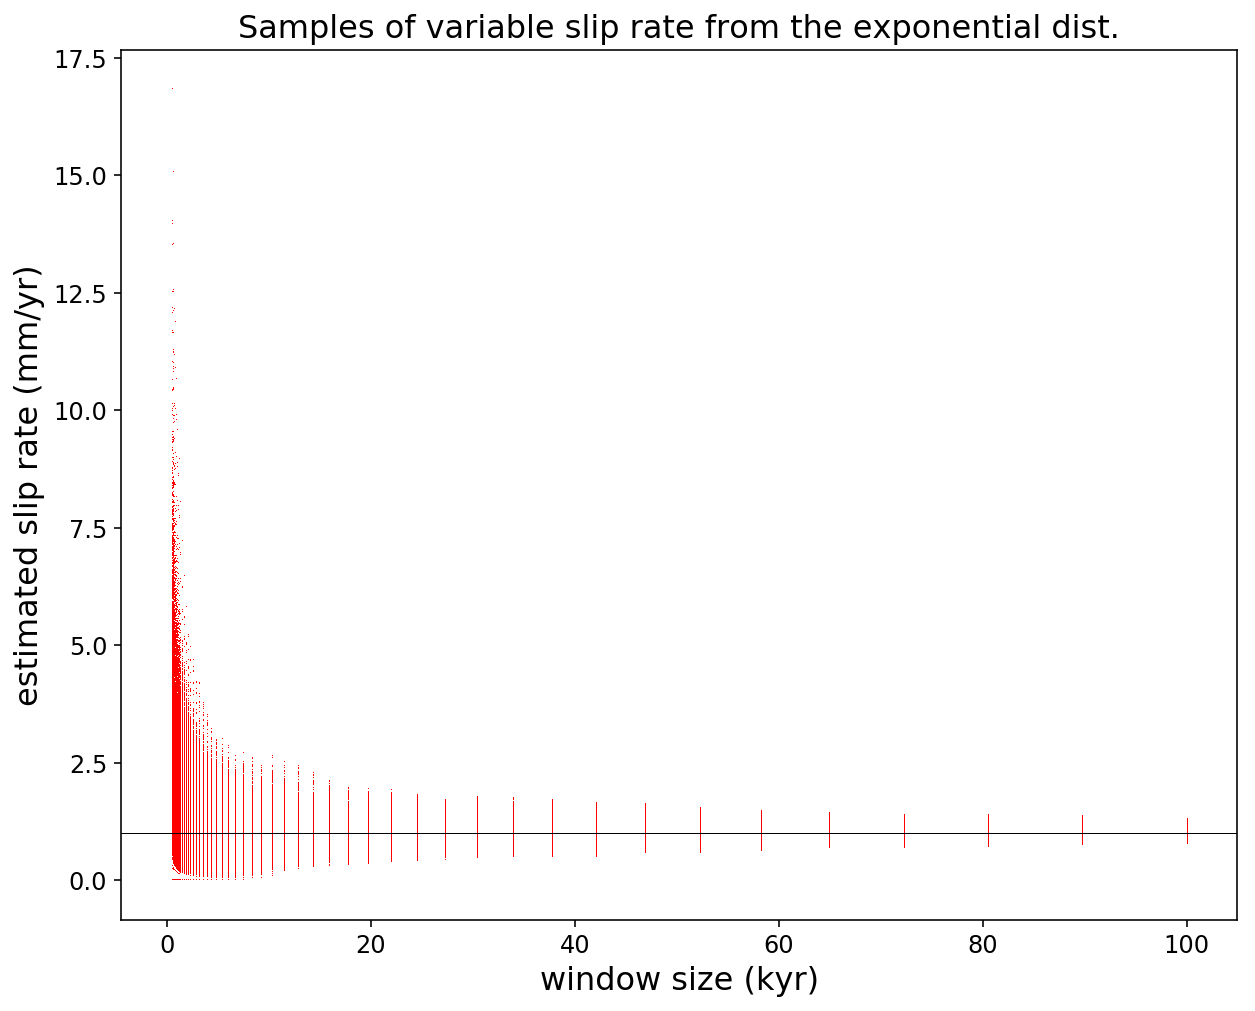

In [19]:
plt.figure(figsize=(10,8))
for w in windows:
    n_exps = len(exp_1000_rates[w][::10])
    plt.plot(np.ones(n_exps) * w / 1000,
             exp_1000_rates[w][::10],
             'r,')

    plt.gca().axhline(1, color='k', lw=0.5)

plt.xlabel('window size (kyr)')
plt.ylabel('estimated slip rate (mm/yr)')
plt.title('Samples of variable slip rate from the exponential dist.')
plt.show()

*__Figure 5__: Slip rate estimates from the exponential distribution.*

Figure 5 shows a huge amount of scatter at short timescales, and decreasingly less scatter with more time. However, there is a ton of overplotting in the data.  We're going to get a lot more out of looking at the aggregate statistics for each. I don't want to make the assumption that the data are normally distributed (I assume the opposite for short timescales in fact) so I will look at the percentages--specifically the outer quartiles, the 1st and 99th percentages (representing the total variation with slightly less noise than the min and max), and the inner quartiles, the 25th and 75th percentile and the median.

To calculate these, we'll iterate through both the slip rate estimate arrays for each window size, and the percentiles, with some nested dictionary comprehensions.

In [20]:
pctiles = [1, 25, 50, 75, 99]

logn_1000_500_rate_quarts = {w: {p: ss.scoreatpercentile(
                                        logn_1000_500_rates[w], p)
                                 for p in pctiles}
                             for w in windows}

logn_1000_1000_rate_quarts = {w: {p: ss.scoreatpercentile(
                                        logn_1000_1000_rates[w], p)
                                 for p in pctiles}
                             for w in windows}

logn_1000_2000_rate_quarts = {w: {p: ss.scoreatpercentile(
                                        logn_1000_2000_rates[w], p)
                                 for p in pctiles}
                             for w in windows}

exp_1000_rate_quarts = {w: {p: ss.scoreatpercentile(
                                        exp_1000_rates[w], p)
                                 for p in pctiles}
                             for w in windows}

Now we'll go through and make arrays of the percentiles at each window, which just makes it quicker to plot.

In [21]:
logn_1000_500_rq_arrays = {p: np.array([logn_1000_500_rate_quarts[w][p]
                                        for w in windows])
                           for p in pctiles}

logn_1000_1000_rq_arrays = {p: np.array([logn_1000_1000_rate_quarts[w][p]
                                        for w in windows])
                           for p in pctiles}

logn_1000_2000_rq_arrays = {p: np.array([logn_1000_2000_rate_quarts[w][p]
                                        for w in windows])
                           for p in pctiles}

exp_1000_rq_arrays = {p: np.array([exp_1000_rate_quarts[w][p]
                                   for w in windows])
                      for p in pctiles}

## Visualizing the results

Finally, we can look at the results.

First, though, a little something to help clarify and extend these observations.  By dividing the window length by the mean recurrence interval, we can think of these results as varying by the number of mean earthquake cycles that have transpired.

In [22]:
eq_cycles = windows / 1000

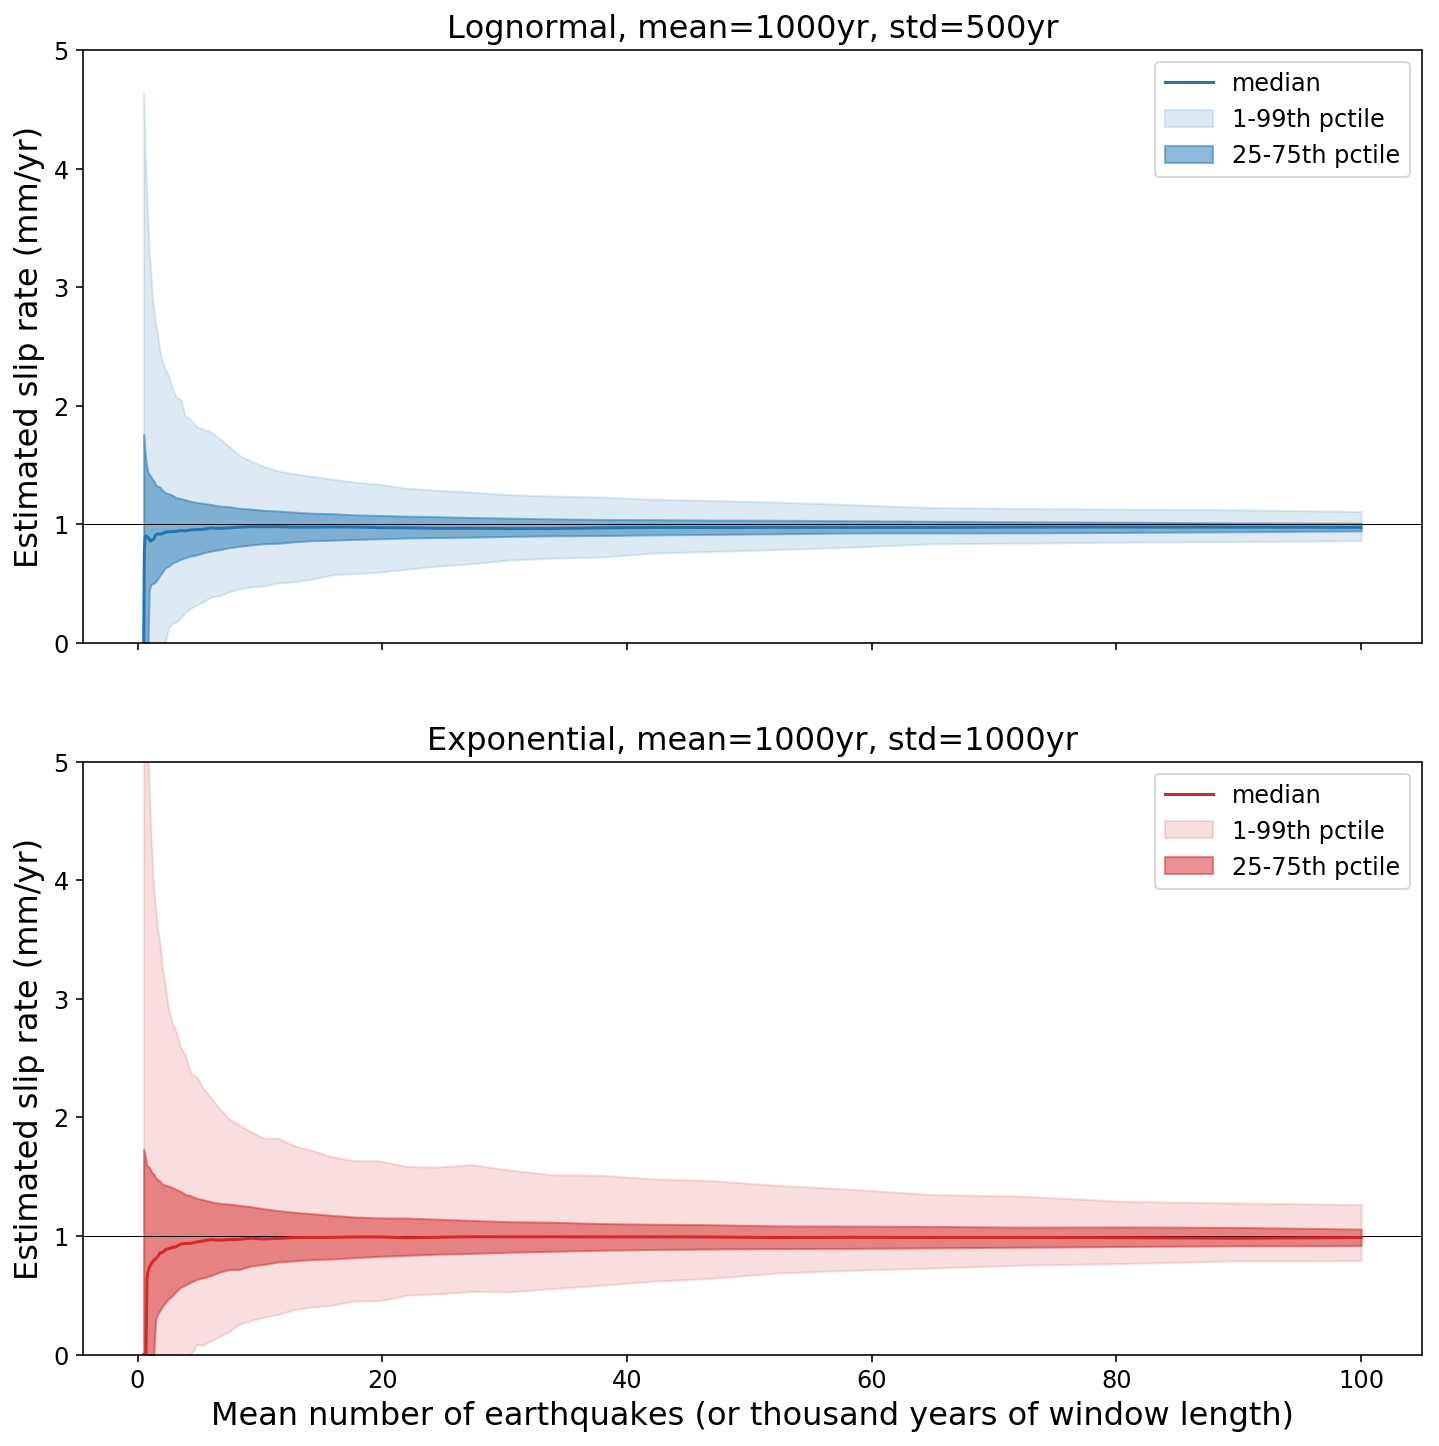

In [23]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(12,12),
                             sharex=True, sharey=True)

ax0.axhline(1, color='k', lw=0.5)

ax0.fill_between(eq_cycles, logn_1000_500_rq_arrays[1],
                            logn_1000_500_rq_arrays[99],
                 alpha=0.15, color='C0',
                 label='1-99th pctile')
ax0.fill_between(eq_cycles, logn_1000_500_rq_arrays[25],
                            logn_1000_500_rq_arrays[75],
                 alpha=0.5, color='C0',
                 label='25-75th pctile')


ax0.plot(eq_cycles, logn_1000_500_rq_arrays[50], 'C0-', label='median')

ax0.set_ylabel('Estimated slip rate (mm/yr)')
ax0.legend(loc='upper right')
ax0.set_title('Lognormal, mean=1000yr, std=500yr')



ax1.axhline(1, color='k', lw=0.5)

ax1.fill_between(eq_cycles, exp_1000_rq_arrays[1],
                            exp_1000_rq_arrays[99],
                 alpha=0.15, color='C3',
                 label='1-99th pctile')

ax1.fill_between(eq_cycles, exp_1000_rq_arrays[25],
                            exp_1000_rq_arrays[75],
                 alpha=0.5, color='C3',
                 label='25-75th pctile')


ax1.plot(eq_cycles, exp_1000_rq_arrays[50], 'C3-', label='median')

ax1.legend(loc='upper right')
ax1.set_title('Exponential, mean=1000yr, std=1000yr')

ax1.set_ylabel('Estimated slip rate (mm/yr)')
ax1.set_xlabel('Mean number of earthquakes (or thousand years of window length)')
#ax0.set_xscale('log')
#plt.xlim([0, 20])
ax0.set_ylim([0,5])

plt.show()

*__Figure 6:__ Outer and inner quartiles for the periodic (top) and exponential/random (bottom) distributions, as a function of the window length (expressed either in number of mean earthquake cycles, or in thousands of years given a 1 mm/yr slip rate).*

Figure 6 shows the results we've been desiring for two of the distributions (we'll compare to the others in a minute). We can see that the total variability of slip rate estimates decreases from an enormous range at a few thousand years to a more stable rate at a hundred thousand years. The total range, as estimated by the 1st and 99th percentiles, is within maybe 10% of the true rate for the periodic series after 100,000 years, and maybe 30% for the random time series after the same time interval. The inner quartiles are less than half of that, meaning that there is good clustering of the data around the median.  The rates also appear slightly skewed towards the high end, but nothing major. This is an effect of including truncated observations, I believe.

The data up to about 10,000 years have some interesting attributes. The first is that the higher end of the rates are really high, but the rest are lower than average. I think the low bias is also an effect of truncating the observations, by sometimes simply not having enough earthquakes within the window to get a meaningful average (the really high values are from when there is a big displacement from one or two earthquakes inside a very short window).  The lowest estimates don't rise above zero for 5,000 years, simply due to there being a few inter-event times longer than this. This means that rarely, mid-Holocene units covering faults with 1 mm/yr slip rates and 1,000 year mean recurrence intervals (pretty dangerous from a hazard perspective) could show no offset and be considered 'inactive', if they're even detected.  Ten cuidado.

We should look at all of the distributions, to compare. First, we'll make a plotting function to avoid retyping all of the plotting code (which is far more verbose than the analysis code to begin with). Then, we'll use said function.

In [24]:
# Plotting function

def plot_rate_quartiles(quarts=None, median=True, xlim=None, ylim=None,
                        log_x=False, log_y=False, fill_between=False,
                        mean=1, ax=None):
    if mean is not False:
        ax.axhline(mean, color='k', lw=0.5)
    

    ax.plot(eq_cycles, logn_1000_500_rq_arrays[quarts[0]], color='C0')
    ax.plot(eq_cycles, logn_1000_500_rq_arrays[quarts[1]], color='C0',
            label='logn, μ=1000, σ=500')

    ax.plot(eq_cycles, logn_1000_1000_rq_arrays[quarts[0]], color='C1')
    ax.plot(eq_cycles, logn_1000_1000_rq_arrays[quarts[1]], color='C1',
            label='logn, μ=1000, σ=1000')

    ax.plot(eq_cycles, logn_1000_2000_rq_arrays[quarts[0]], color='C2')
    ax.plot(eq_cycles, logn_1000_2000_rq_arrays[quarts[1]], color='C2',
            label='logn, μ=1000, σ=2000')

    ax.plot(eq_cycles, exp_1000_rq_arrays[quarts[0]], color='C3')
    ax.plot(eq_cycles, exp_1000_rq_arrays[quarts[1]], color='C3',
            label='exp, μ=σ=1000')
    
    if median is True:
        ax.plot(eq_cycles, logn_1000_500_rq_arrays[50], 'C0--')
        ax.plot(eq_cycles, logn_1000_1000_rq_arrays[50], 'C1--')
        ax.plot(eq_cycles, logn_1000_2000_rq_arrays[50], 'C2--')
        ax.plot(eq_cycles, exp_1000_rq_arrays[50], 'C3--')
    
    if xlim is not None:
        ax.set_xlim(xlim)
    
    if ylim is not None:
        ax.set_ylim(ylim)
        
    if log_x is True:
        ax.set_xscale('log')
    
    if log_y is True:
        ax.set_yscale('log')
        
    return ax

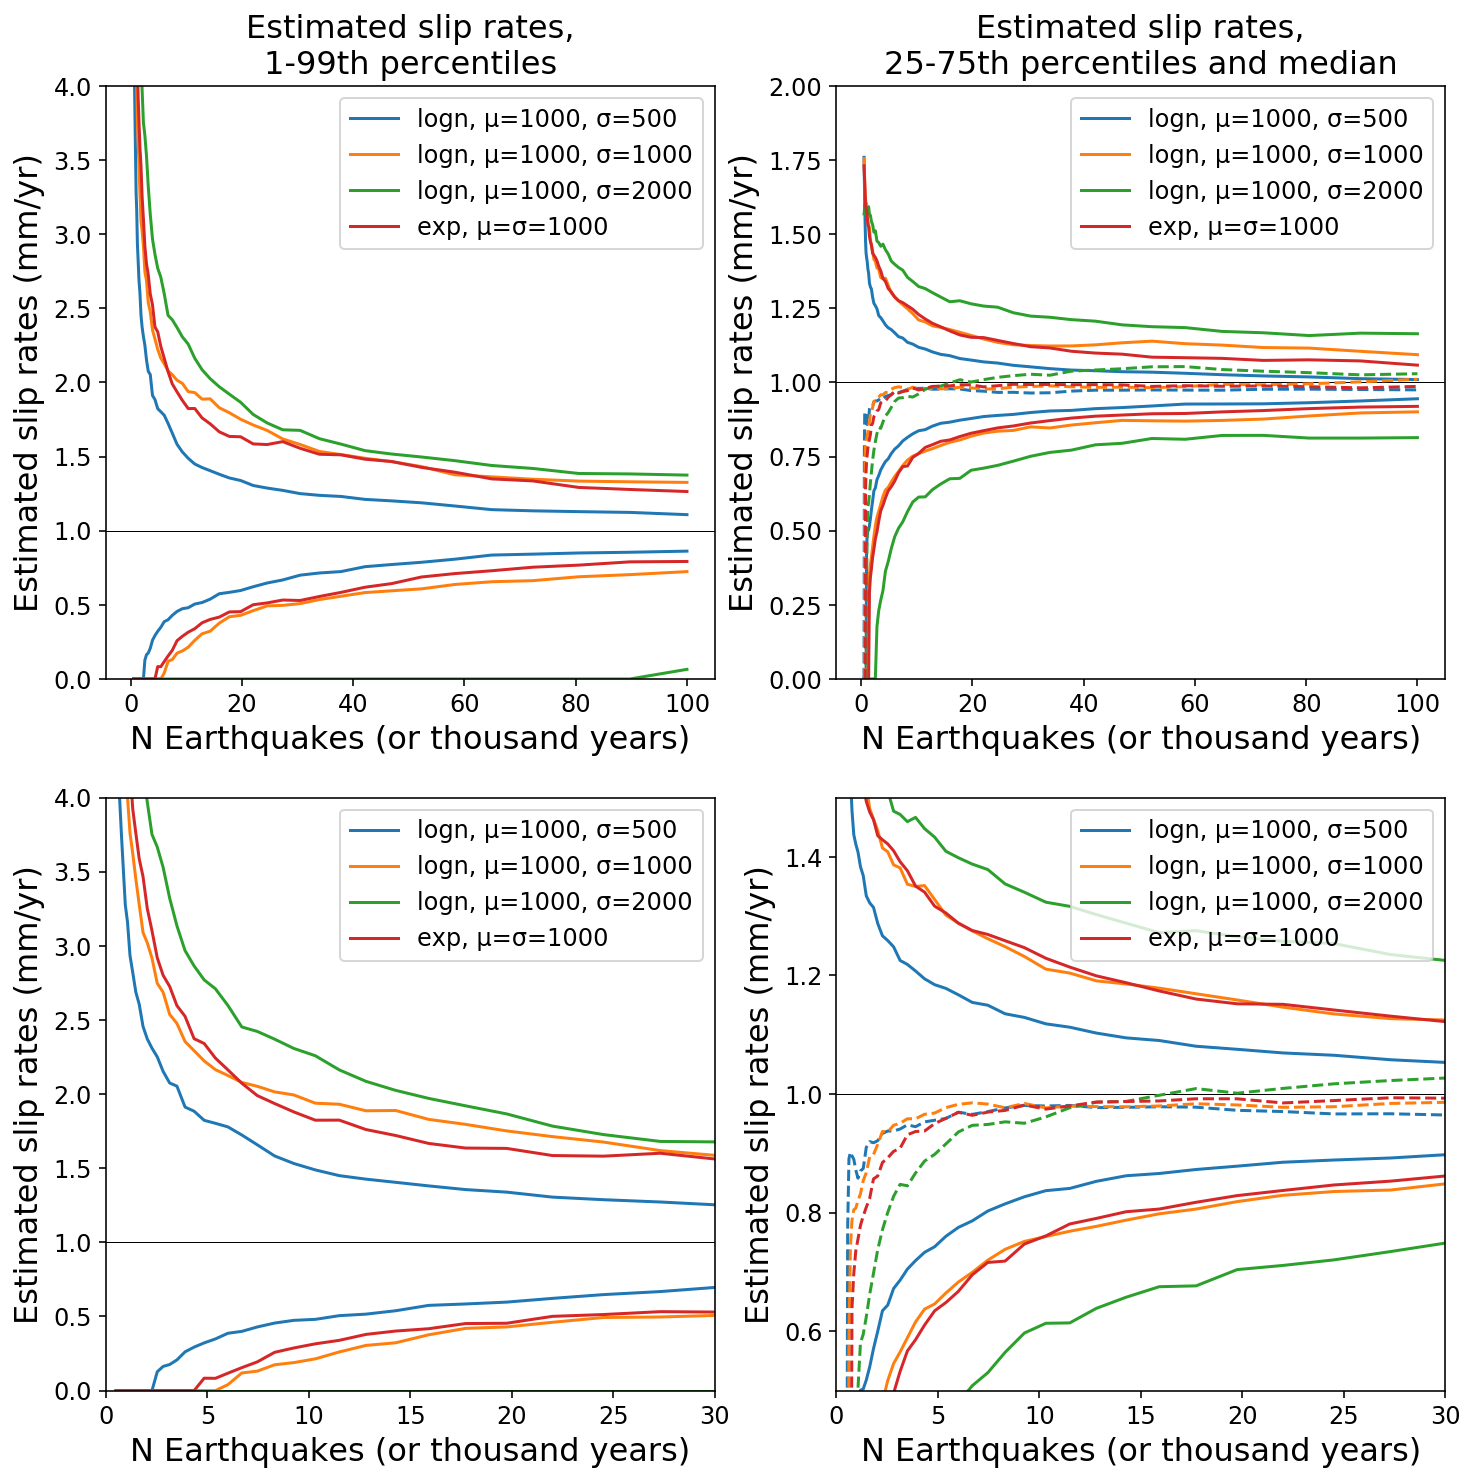

In [25]:
# Plot the rates through time

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,12))

ax1 = plot_rate_quartiles(quarts=(1,99), ax=ax1, median=False, 
                          ylim=(0,4))

ax1.legend(loc='upper right')
ax1.set_title('Estimated slip rates,\n1-99th percentiles')
ax1.set_ylabel('Estimated slip rates (mm/yr)')
ax1.set_xlabel('N Earthquakes (or thousand years)')


ax2 = plot_rate_quartiles(quarts=(25,75), ax=ax2, median=True, 
                          ylim=(0,2))

ax2.legend(loc='upper right')
ax2.set_title('Estimated slip rates,\n25-75th percentiles and median')
ax2.set_ylabel('Estimated slip rates (mm/yr)')
ax2.set_xlabel('N Earthquakes (or thousand years)')


ax3 = plot_rate_quartiles(quarts=(1,99), ax=ax3, median=False, 
                          ylim=(0,4), xlim=(0,30))

ax3.legend(loc='upper right')
ax3.set_ylabel('Estimated slip rates (mm/yr)')
ax3.set_xlabel('N Earthquakes (or thousand years)')




ax4 = plot_rate_quartiles(quarts=(25,75), ax=ax4, median=True, 
                          ylim=(0.5,1.5), xlim=(0,30))

ax4.legend(loc='upper right')
ax4.set_ylabel('Estimated slip rates (mm/yr)')
ax4.set_xlabel('N Earthquakes (or thousand years)')

plt.show()

*__Figure 7:__ Estimated slip variability for all distributions. Right column shows total variability (1-99th percentiles), while left column shows inner quartile variability (25th-75th percentiles). Top row shows the full 100 earthquake window (or 100,000 year window) while the bottom row shows 30/30,000 for the same data.*

Figure 7 is the money plot for this paper. We can see, for each distribution, how the variation in slip rate estimates change with increasing window length, and how the estimtes are affected by the distribution.

Clearly, the rates stabilize to something nearing the mean rate with increasing time. This should be no surprise. However, it takes 5-20 earthquakes (5,000-20,000 years for our model fault) for the uncertainty to stop, depending on the distribution. The total variation drops below a factor of two beyond this point, and the interquartile range is ±25% here, which is more than acceptable for most faults.

The similarities between the lognormal w/ COV=1 and the exponential (also w/ COV=1) show that the actual distribution type doesn't make a huge difference when it comes to impacting slip rate estimates, but the COV definitely does. This is good, because it means that we don't have to worry too much about which one is the most realistic geologically.  (For other purposes, such as time-dependent seismic hazard, it absolutely does make a difference at the tails.)

The lowest values stay at about 0 for most distributions for quite some time. This is worst for the clustered distribution--the 1st percentile distribution doesn't even get off the couch until 90 mean earthquake cycles. The others are quite a bit better, but this can pose a problem for assessments of activity on slow-moving faults.

Similarly, the short-term low bias in the median values are robust across distributions.  It takes ~10 earthquakes for the median to approach the mean--obviously it's a longer convergence process the higher the COV of the distribution.

## Earthquake-cycle normalization

One really important thing to realize about this analysis is that the results presented will be applicable to faults with different slip rates and different mean per-event displacements by normalizing them to the number of earthquakes. This can be done if the true slip rate is known (or can be independently estimated), and/or if some per-event mean displacement is known.

This isn't as important when looking at paleoseismologic data, but it is for neotectonic data, where the measurements are in cumulative offset (in meters) and the age of the features; it's worth doing a little back-of-the-envelope math to figure out exactly how many earthquakes may have transpired, and what this means about interpreting the slip rate, as the uncertainties that are propagated through in the literature are *only measurement uncertainty*, i.e. epistemic uncertainty. This is *especially* true when evaluating slip rate changes over a dataset (a terrace flight for example), because the slip rates estimated over some of the intervals between measurements may actually be pretty short even though the total dataset may span tens to hundreds of thousands of years.

The normalization factor $N$ here is:

$$N = \frac{D}{SR}$$

where $D$ is slip (displacement) per event and $SR$ is slip rate.

For example, if a fault has a slip rate of 5 mm/yr but a mean per-event slip of 1 m, then all of the years listed above could be divided by 5, as the earthquakes would be 5 times as frequent. If the slip per-event is 2.5 m but the slip rate is still 1 mm/yr, then the mean recurrence interval is 2.5 times as long so the timescales should be lengthened by that much.

### Final plot: Histograms of each recurrence distribution for some key window lengths

This is something I wanted to do out of curiosity, but it ended up not being as informative as Figure 7, so I'm sticking it here.

In [26]:
def plot_hists(dist, ax, winds, window_labels, bins=None, c='C0',
               cumulative=False):
    
    l_seq = (':', '-.', '--', '-')
    
    for i, w in enumerate(winds):
        ax.hist(dist[w], bins=bins,
                density=True,
                histtype='step',
                cumulative=cumulative,
                label=window_labels[i],
                color=c,
                lw=0.5 * i + 1,
                ls=l_seq[i])
        
        ax.hist(dist[w], bins=bins,
                density=True,
                histtype='stepfilled', 
                color=c, alpha=0.3,
                lw=0.5 * i + 1)
        
    ax.legend(title='num. earthquakes', loc='best')
    return ax

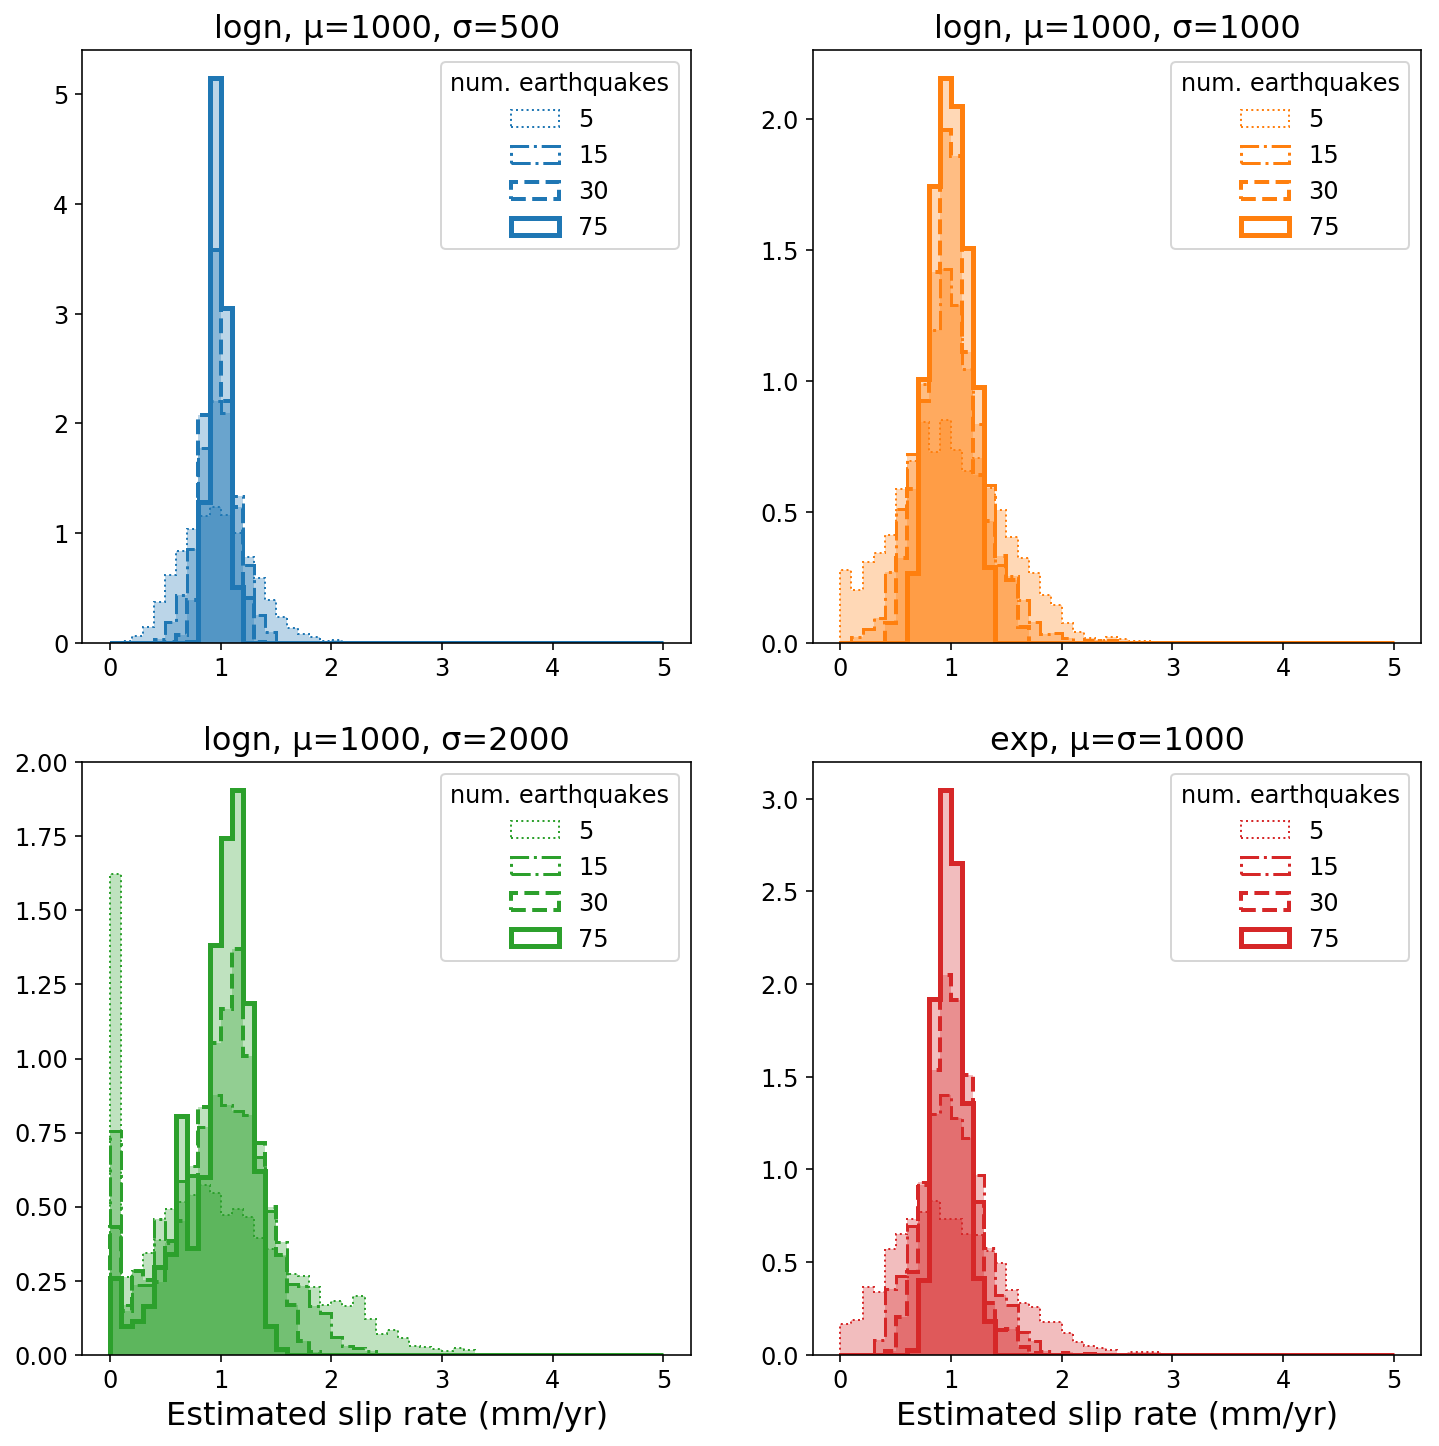

In [27]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,12))

winds = (4843, 14279, 30439, 72297)
w_labs = ('5', '15', '30', '75')
r_bins= np.linspace(0, 5, 51)

ax1 = plot_hists(logn_1000_500_rates, ax1, winds, w_labs, 
                 bins=r_bins, c='C0')
ax1.set_title('logn, μ=1000, σ=500')

ax2 = plot_hists(logn_1000_1000_rates, ax2, winds, w_labs, 
                 bins=r_bins, c='C1')
ax2.set_title('logn, μ=1000, σ=1000')


ax3 = plot_hists(logn_1000_2000_rates, ax3, winds, w_labs, 
                 bins=r_bins, c='C2')
ax3.set_title('logn, μ=1000, σ=2000')
ax3.set_xlabel('Estimated slip rate (mm/yr)')


ax4 = plot_hists(exp_1000_rates, ax4, winds, w_labs, 
                 bins=r_bins, c='C3')
ax4.set_title('exp, μ=σ=1000')
ax4.set_xlabel('Estimated slip rate (mm/yr)')

plt.show()


*__Figure 8:__ Histograms of slip rates for different distributions at (about) 5, 15, 30, and 75 earthquake cycles.*

The things worth noting from Figure 8 are that the distributions are pretty regular and get tamped down between ~10-20 earthquakes (15 and 30 look pretty similar), though the tails are quite a bit closer in after 75 earthquakes. For the clustered distribution, the scatter is persistent (though it does decrease) and the probability of a zero slip rate stays pretty high for tens of mean event timescales. To the extent that this recurrence distribution characterizes any faults, this means that they may give indication of Holocene inactivity (i.e., uncut Holocene deposits on top) despite having dangerous slip rates.

## Some final issues

### The effect of epistemic (e.g., measurement) uncertainty

The big thing that I haven't dealt with here is measurement uncertainty. This is sizeable, often a factor of two for any measurement. My guess is that the measurement uncertainty won't change these results too much, but they may instead mask the effects, and make it much harder to identify real changes in slip rate.

### Changing per-event slip distributions

Though I didn't write at depth about this, changing slip magnitude distributions should have exactly the same effect as changing the recurrence rates.

### The physical mechanisms behind the COV

Though this work is completely statistical, I very much believe that the statistics are a consequence of the physics. I think there is good evidence that there is a lot of variation in the aggregate recurrence behavior of different faults and fault systems. While this post is too long already for a data-driven, in-depth discussion of the matter (see the slides from recent talks for some of this), I think it's likely that big, fast, plate-boundary faults such as the San Andreas have somewhat more periodic than random behavior (COV < 1) and slow intraplate faults may have more random if not clustered behavior (COV > 1).

However, I don't know really what is driving this variability in both the intervals on a single fault and the aggregate behavior between different faults. My guess is that it has to do with the amount of stress storage, different fault friction on faults of different 'maturity', and different bulk sensitivities to triggering (a small event may not be able to set off the San Andreas, but the San Andreas can set off small events...). There may also be a component of variations with loading rate, or other transient loads or stresses, that are weaker near plate boundaries (maybe in an absolute sense, maybe relative to plate stresses).

I'm pretty interested, though, and I think that by learning a bit more about the statistical behavior of different systems, we'll be able to infer a lot more about the physics of earthauakes and faulting. But this will take a good mixture of field studies, physical modeling, and statistical modeling. It's a bit much for a blog post.

# Takeaways

This study shows how the natural variability (aleatoric uncertainty) in the earthquake cycle can affect the estimated slip rates, *in the absence of any epistemic uncertainty*:  No errors in the age or the offset over these time windows. 

### Takeaway 1: It takes 10-20 earthquakes before estimated slip rates stabilize.

- Slip rates can be highly variable over shorter timescales.
- Neotectonic studies should ballpark the number of earthquakes and evaluate the results accordingly.
- Extreme care should be taken when estimating slip rates from paleoseismology.
- My rule of thumb: if there is less than 40 m of offset, take the slip rate with a grain of salt.

### Takeaway 2: The Coefficient of Variation (COV) is most important in the time to stabilization.

- The details of the distributions aren't very important, just the aggregate statistics such as the COV (mean / std).
- Slip rates stabilize more quickly with lower COVs.
- Changing the COV of the per-event slip distribution (not done here) will have the same effect.

### Takeaway 3: Clustered or anti-periodic active faults may lie dormant for a long, long time.
- Slow, intracontinental faults are most likely to have random or clustered earthquake recurrence behavior
- Signs of Holocene inactivity must be evaluated critically, as faults just may be dormant.
